#### Notebook purpose:

- calculate the overturning circulation / learn to calculate the overturning cirucation

someone at geomar wrote a code for it sort of:
https://git.geomar.de/open-source/meridional-overturning-circulation-from-nemo-output/-/blob/main/MOC.ipynb

http://sam.ucsd.edu/ltalley/sio210/Global_circulation/lecture_global.pdf

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle

#import mapfxn as mf
#reload(mf)

plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

# How does overturning work? (From Talley)

![title](overturning.png)

(50, 182)
(31, 50, 182)
(31, 50, 182)
/gpfs/data/greenocean/software/runs/TOM12_DW_WE20/ORCA2_1m_19880101_19881231_grid_V.nc
[4.9999380e+00 1.5000288e+01 2.5001759e+01 3.5005413e+01 4.5013317e+01
 5.5029499e+01 6.5061806e+01 7.5125511e+01 8.5250366e+01 9.5494286e+01
 1.0596992e+02 1.1689624e+02 1.2869791e+02 1.4219525e+02 1.5896062e+02
 1.8196278e+02 2.1664792e+02 2.7247672e+02 3.6430304e+02 5.1153476e+02
 7.3220087e+02 1.0332173e+03 1.4056975e+03 1.8308850e+03 2.2897678e+03
 2.7682424e+03 3.2574788e+03 3.7524421e+03 4.2504014e+03 4.7499131e+03
 5.2502266e+03]
(31, 182)
7.668801974024801


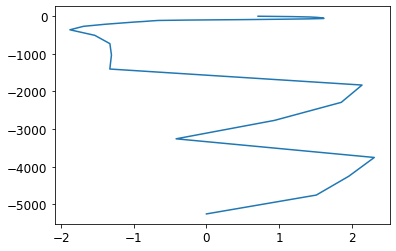

In [23]:
tnc = nc.Dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
u_direction_size = tnc['e1v'][0,0:50,:]
print(np.shape(u_direction_size))
w_direction_size = tnc['e3v_0'][0,:,0:50,:]
print(np.shape(w_direction_size))
area_broad = np.zeros_like(w_direction_size)
for i in range(0,31):
    area_broad[i,:,:] = w_direction_size[i,:,:]*u_direction_size[:,:]

print(np.shape(area_broad))

#calculate it for one month, for one latitude, #10th from bottom

rdir = '/gpfs/data/greenocean/software/runs/'
tdir = 'TOM12_DW_WE20'
yr = 1988
tw = glob.glob(f'{rdir}{tdir}/*{yr}*{yr}*_grid_V.nc')
print(tw[0])
t_test = nc.Dataset(tw[0])
lat = 30
month = 5
depthv = t_test['depthv'][:]
print(depthv)
sverdrups_10 = (t_test['vomecrty'][month,:,lat,:]+t_test['vomeeivv'][month,:,lat,:]) * area_broad[:,lat,:] * 1e-6
print(np.shape(sverdrups_10))
print(np.nansum(sverdrups_10))
plt.plot(np.nansum(sverdrups_10,axis = 1),-depthv)

(50, 182)
(31, 50, 182)
(31, 50, 182)
/gpfs/data/greenocean/software/runs/TOM12_DW_WE20/ORCA2_1m_19880101_19881231_grid_V.nc
[4.9999380e+00 1.5000288e+01 2.5001759e+01 3.5005413e+01 4.5013317e+01
 5.5029499e+01 6.5061806e+01 7.5125511e+01 8.5250366e+01 9.5494286e+01
 1.0596992e+02 1.1689624e+02 1.2869791e+02 1.4219525e+02 1.5896062e+02
 1.8196278e+02 2.1664792e+02 2.7247672e+02 3.6430304e+02 5.1153476e+02
 7.3220087e+02 1.0332173e+03 1.4056975e+03 1.8308850e+03 2.2897678e+03
 2.7682424e+03 3.2574788e+03 3.7524421e+03 4.2504014e+03 4.7499131e+03
 5.2502266e+03]
(31, 182)


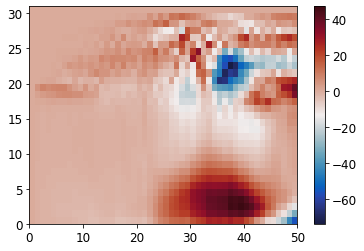

In [31]:
tnc = nc.Dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
u_direction_size = tnc['e1v'][0,0:50,:]
print(np.shape(u_direction_size))
w_direction_size = tnc['e3v_0'][0,:,0:50,:]
print(np.shape(w_direction_size))
area_broad = np.zeros_like(w_direction_size)
for i in range(0,31):
    area_broad[i,:,:] = w_direction_size[i,:,:]*u_direction_size[:,:]

print(np.shape(area_broad))

#calculate it for one month, for one latitude, #10th from bottom

rdir = '/gpfs/data/greenocean/software/runs/'
tdir = 'TOM12_DW_WE20'
yr = 1988
tw = glob.glob(f'{rdir}{tdir}/*{yr}*{yr}*_grid_V.nc')
print(tw[0])
t_test = nc.Dataset(tw[0])
lat = 30
month = 5
depthv = t_test['depthv'][:]
print(depthv)
yearly_vels = np.nansum((t_test['vomecrty'][:,:,lat,:]+t_test['vomeeivv'][:,:,lat,:]),axis = 0)
print(np.shape(yearly_vels))
sverdrups_10 = (yearly_vels) * area_broad[:,lat,:] * 1e-6

# plt.plot(np.nansum(sverdrups_10,axis = 1),-depthv)

manual_sverdrups = np.zeros([31,50])
for i in range(0,50):
    lat = i
    yearly_vels = np.nansum((t_test['vomecrty'][:,:,lat,:]+t_test['vomeeivv'][:,:,lat,:]),axis = 0)
    sverdrups_10 = (yearly_vels) * area_broad[:,lat,:] * 1e-6
    manual_sverdrups[:,i] = np.nansum(sverdrups_10,axis = 1)
    
    
plt.pcolormesh(manual_sverdrups, cmap = cm.balance)
plt.colorbar()

(50, 182)
(31, 50, 182)
(31, 50, 182)
/gpfs/data/greenocean/software/runs/TOM12_DW_WE20/ORCA2_1m_19880101_19881231_grid_V.nc
(12, 31, 50, 182)


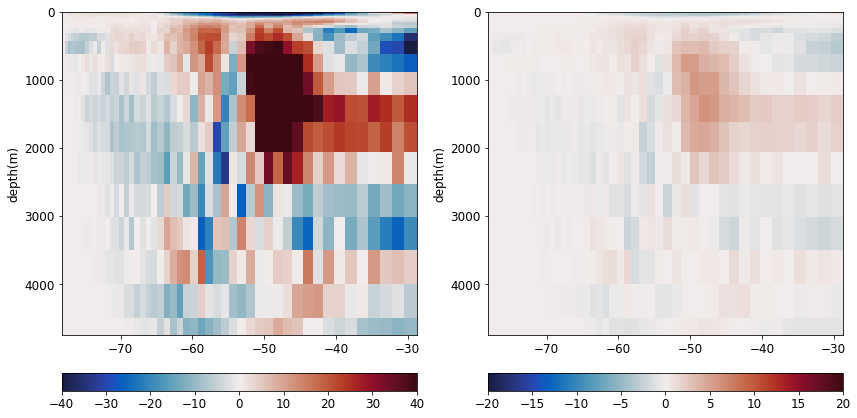

In [110]:
tnc = nc.Dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
u_direction_size = tnc['e1v'][0,0:50,:]
print(np.shape(v_direction_size))
w_direction_size = tnc['e3v_0'][0,:,0:50,:]
print(np.shape(w_direction_size))
area_broad = np.zeros_like(w_direction_size)
for i in range(0,31):
    area_broad[i,:,:] = w_direction_size[i,:,:]*u_direction_size[:,:]

print(np.shape(area_broad))
rdir = '/gpfs/data/greenocean/software/runs/'
tdir = 'TOM12_DW_WE20'
yr = 1988
tw = glob.glob(f'{rdir}{tdir}/*{yr}*{yr}*_grid_V.nc')
print(tw[0])
t_test = nc.Dataset(tw[0])

sverdrups_total = -1 * (t_test['vomecrty'][:,:,0:50,:]+t_test['vomeeivv'][:,:,0:50,:])*area_broad * 1e-6 #clockwise is positive
print(np.shape(sverdrups_total))
#sverdrups_sum = np.nansum(sverdrups_total,axis = 2)

sverdrups_mean = np.nansum(np.nanmean(sverdrups_total,axis=0),axis = 2)
sverdrups_sum = np.nansum(np.nansum(sverdrups_total,axis=0),axis = 2)
lats = t_test['nav_lat'][0:50,0]
depthv = (t_test['depthv'][:])


fact = 0.7 
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(20*fact, 10*fact))
mesh = ax1.pcolormesh(lats,depthv,sverdrups_sum, cmap = cm.balance, vmin = -40, vmax = 40)

ax1.set_ylim([0,depthv[29]])
ax1.invert_yaxis()
cbar = fig.colorbar(mesh, ax=ax1, orientation = 'horizontal',fraction=0.05, pad=0.1)#, ticks = tticks)
#cbar.set_label(label=' mol C m$^{-2}$ d$^{-1}$ tramsport')
ax1.set_ylabel('depth(m)')

mesh = ax2.pcolormesh(lats,depthv,sverdrups_mean, cmap = cm.balance, vmin = -20, vmax = 20)

ax2.set_ylim([0,depthv[29]])
ax2.invert_yaxis()
ax2.set_ylabel('depth(m)')
cbar = fig.colorbar(mesh, ax=ax2, orientation = 'horizontal',fraction=0.05, pad=0.1)#, ticks = tticks)

In [112]:
print(np.shape(sverdrups_sum))

(31, 50)


In [115]:
sverdrups_sum_ts = np.zeros([70,31,50])
sverdrups_mean_ts = np.zeros([70,31,50])

tnc = nc.Dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
u_direction_size = tnc['e1v'][0,0:50,:]
print(np.shape(v_direction_size))
w_direction_size = tnc['e3v_0'][0,:,0:50,:]
print(np.shape(w_direction_size))
area_broad = np.zeros_like(w_direction_size)
for i in range(0,31):
    area_broad[i,:,:] = w_direction_size[i,:,:]*u_direction_size[:,:]


yrs = np.arange(1950,2020,1)
for i in range(0,len(yrs)):
    yr = yrs[i]
    rdir = '/gpfs/data/greenocean/software/runs/'
    tdir = 'TOM12_DW_WE20'
    tw = glob.glob(f'{rdir}{tdir}/*{yr}*{yr}*_grid_V.nc')
    t_test = nc.Dataset(tw[0])

    sverdrups_total = -1 * (t_test['vomecrty'][:,:,0:50,:]+t_test['vomeeivv'][:,:,0:50,:])*area_broad * 1e-6 #clockwise is positive
    #sverdrups_sum = np.nansum(sverdrups_total,axis = 2)

    sverdrups_mean = np.nansum(np.nanmean(sverdrups_total,axis=0),axis = 2)
    sverdrups_sum = np.nansum(np.nansum(sverdrups_total,axis=0),axis = 2)
    sverdrups_sum_ts[i,:,:] = sverdrups_sum
    sverdrups_mean_ts[i,:,:] = sverdrups_mean
    if i%20 == 0:
        print(i)




(50, 182)
(31, 50, 182)
0
20
40
60


In [116]:
sverdrups_sum_ts_mean = np.nanmean(sverdrups_sum_ts, axis = 0)
sverdrups_mean_ts_mean = np.nanmean(sverdrups_mean_ts, axis = 0)

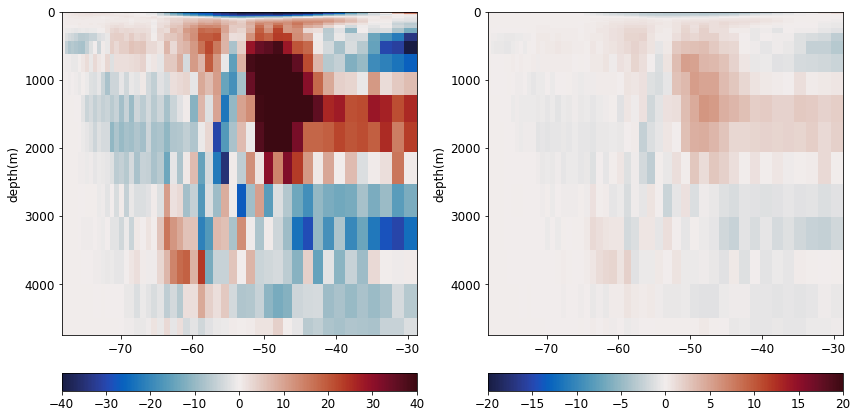

In [117]:
fact = 0.7 
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(20*fact, 10*fact))
mesh = ax1.pcolormesh(lats,depthv,sverdrups_sum_ts_mean, cmap = cm.balance, vmin = -40, vmax = 40)

ax1.set_ylim([0,depthv[29]])
ax1.invert_yaxis()
cbar = fig.colorbar(mesh, ax=ax1, orientation = 'horizontal',fraction=0.05, pad=0.1)#, ticks = tticks)
#cbar.set_label(label=' mol C m$^{-2}$ d$^{-1}$ tramsport')
ax1.set_ylabel('depth(m)')

mesh = ax2.pcolormesh(lats,depthv,sverdrups_mean_ts_mean, cmap = cm.balance, vmin = -20, vmax = 20)

ax2.set_ylim([0,depthv[29]])
ax2.invert_yaxis()
ax2.set_ylabel('depth(m)')
cbar = fig.colorbar(mesh, ax=ax2, orientation = 'horizontal',fraction=0.05, pad=0.1)#, ticks = tticks)

##

In [78]:
 import xarray as xr
import datetime
import numpy as np
import pandas as pd
import datetime
import seawater as sw

In [86]:
 # compute the reference latitude and the area for meridional flux computations
ds = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc',chunks={'z':-1,'x':-1,'y':-1}).squeeze()
lat_b = ds.gphiv # load global V-grid latitudes
lat_b = lat_b.isel(x=slice(1,-1)) # remove colums at cyclic boundary
ref_lat = lat_b.max(dim='x').compute() # estimate reference latitude (for the whole globe, this is also the result if one considers only ocean cells)
area_b = (ds.e1v * ds.e3v_0)
print(np.shape(area_b))

(149, 182, 31)


In [97]:
ds2 = xr.open_dataset('/gpfs/data/greenocean/software/runs/TOM12_DW_WE20/ORCA2_1m_20200101_20201231_grid_V.nc')
v_b = ds2.vomecrty
F_b = -1 * v_b * area_b / 1e6

moc = F_b.sum(dim={'x'}).sortby('z', ascending=False).cumsum(dim='z').compute()

print(moc)

<xarray.DataArray (time_counter: 12, depthv: 31, y: 149, z: 31)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 4.69484686e+00,  9.38439798e+00,  1.40636693e+01, ...,
           4.81109513e+01,  4.82047497e+01,  4.82985407e+01],
         [ 5.98577815e+00,  1.19648044e+01,  1.79307243e+01, ...,
           6.17654748e+01,  6.18850647e+01,  6.20046453e+01],
         ...,
         [ 1.69904962e+00,  4.07166646e+00,  5.80368701e+00, ...,
           1.85563891e+01,  1.85903344e+01,  1.86242771e+01],
         [-1.69904962e+00, -4.07166646e+00, -5.80368701e+00, ...,
          -1.85563891e+01, -1.85903344e+01, -1.86242771e+01],
         [-6.41860305e+00, -1.32176136e+01, -1.92857040e+01, ...,
          -6.64137780e+01, -6.65420154e+01, -6.66702426e+01]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 2.82403181e+

In [93]:
moc = moc.rename('moc')
moc = moc.assign_coords({'y':ref_lat.values})
print(moc)

<xarray.DataArray 'moc' (time_counter: 12, depthv: 31, y: 149, z: 31)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 4.69484686e+00,  9.38439798e+00,  1.40636693e+01, ...,
           4.81109513e+01,  4.82047497e+01,  4.82985407e+01],
         [ 5.98577815e+00,  1.19648044e+01,  1.79307243e+01, ...,
           6.17654748e+01,  6.18850647e+01,  6.20046453e+01],
         ...,
         [ 1.69904962e+00,  4.07166646e+00,  5.80368701e+00, ...,
           1.85563891e+01,  1.85903344e+01,  1.86242771e+01],
         [-1.69904962e+00, -4.07166646e+00, -5.80368701e+00, ...,
          -1.85563891e+01, -1.85903344e+01, -1.86242771e+01],
         [-6.41860305e+00, -1.32176136e+01, -1.92857040e+01, ...,
          -6.64137780e+01, -6.65420154e+01, -6.66702426e+01]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 2.8240

ValueError: too many values to unpack (expected 2)

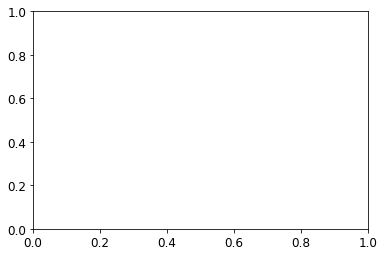

In [96]:
vertvar = moc.z
cp = plt.pcolormesh(ref_lat,vertvar,moc,vmin=-40,vmax=40,cmap=cm.balance)

plt.ylabel('depth [m]',fontsize=15)
plt.contour(ref_lat,vertvar,moc,plotvec,colors='k')

cbar = plt.colorbar(cp,extend = 'both')
cbar.ax.tick_params(labelsize=15)
cbar.set_label(aipg_moc + ' [Sv]',fontsize=15)
plt.gca().invert_yaxis()

plt.xlabel('latitude [°]',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()